In [4]:
## Load bigquery
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [1]:
%%bigquery
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
GROUP BY YEAR, MONTH
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC

,YEAR,MONTH,COMMITS
0,2009,1,396959
1,2009,2,395117
2,2009,3,451412
3,2009,4,422535
4,2009,5,419631
5,2009,6,439477
6,2009,7,441781
7,2009,8,454439
8,2009,9,462903
9,2009,10,482494


In [36]:
%%bigquery total_commits
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
GROUP BY YEAR, MONTH
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC

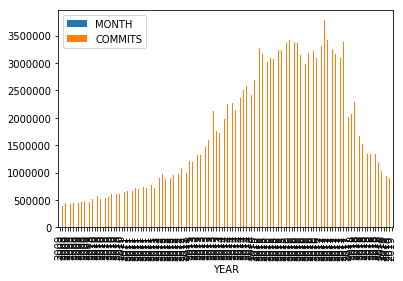

In [37]:
total_commits.plot(kind='bar', x='YEAR');

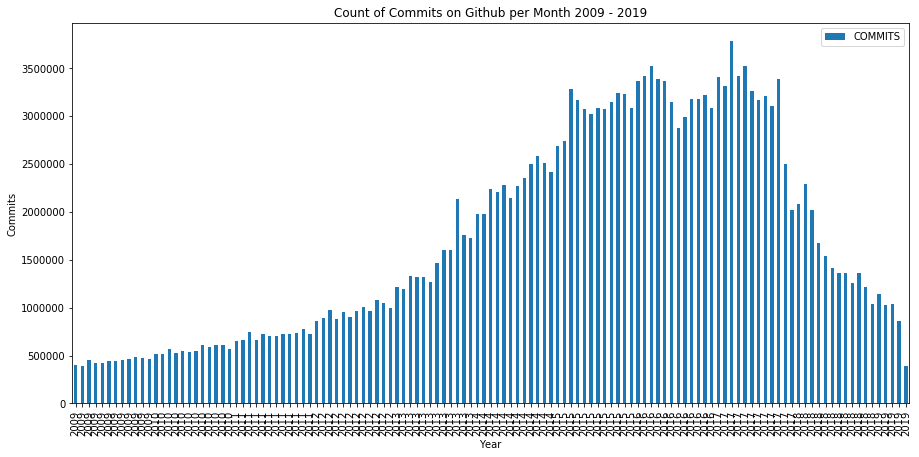

In [6]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
GROUP BY YEAR, MONTH
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC
"""
df = client.query(sql).to_dataframe()
ax = df.plot(kind='bar', x='YEAR', y='COMMITS', figsize=(15,7))
ax.set_title('Count of Commits on Github per Month 2009 - 2019')
ax.set_xlabel('Year')
ax.set_ylabel('Commits');

In [ ]:
## Most (50) common Go packages from Github (BigQuery Dataset)

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()
job_config = bigquery.QueryJobConfig()
job_config.use_legacy_sql = True
sql = """
SELECT
  REGEXP_EXTRACT(line, r'"([^"]+)"') AS url,
  COUNT(*) AS count
FROM
  FLATTEN( (
    SELECT
      SPLIT(SPLIT(REGEXP_EXTRACT(content, r'.*import\s*[(]([^)]*)[)]'), '\n'), ';') AS line,
    FROM (
      SELECT
        id,
        content
      FROM
        [bigquery-public-data:github_repos.contents]
      WHERE
        REGEXP_MATCH(content, r'.*import\s*[(][^)]*[)]')) AS C
    JOIN (
      SELECT
        id
      FROM
        [bigquery-public-data:github_repos.files]
      WHERE
        path LIKE '%.go'
      GROUP BY
        id) AS F
    ON
      C.id = F.id), line)
GROUP BY
  url
HAVING
  url IS NOT NULL
ORDER BY
  count DESC
LIMIT 50
"""
df = client.query(sql,job_config=job_config).to_dataframe()
df

In [ ]:
## Check repos created per year / month

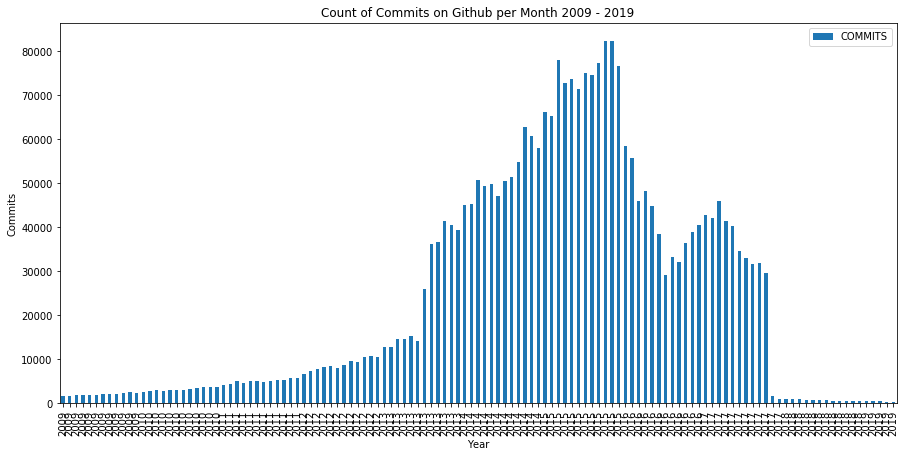

In [1]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS,
    ARRAY_LENGTH(parent) as PARLEN
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
    AND ARRAY_LENGTH(parent) = 0
GROUP BY YEAR, MONTH, PARLEN
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC
"""
df = client.query(sql).to_dataframe()
ax = df.plot(kind='bar', x='YEAR', y='COMMITS', figsize=(15,7))
ax.set_title('Count of Commits on Github per Month 2009 - 2019')
ax.set_xlabel('Year')
ax.set_ylabel('Commits');

In [41]:
import os

API_KEY = os.getenv("LIBRARIES_IO_KEY")
%env LIBRARIES_BASE_URL=https://libraries.io/api/
LIBRARIES_BASE_URL = os.getenv("LIBRARIES_BASE_URL")

env: LIBRARIES_BASE_URL=https://libraries.io/api/


In [42]:
import requests, pandas as pd

request_url = "platforms?api_key"
url = LIBRARIES_BASE_URL+request_url+API_KEY
response = requests.get(url)
data = response.json()
df = pd.DataFrame.from_dict(data)
df.head

<bound method NDFrame.head of       color default_language                                   homepage  \
0   #375eab             None                      http://go-search.org/   
1   #f1e05a       JavaScript                      https://www.npmjs.com   
2   #4F5D95              PHP                      https://packagist.org   
3   #b07219             Java                           http://maven.org   
4   #3572A5           Python                          https://pypi.org/   
5   #178600               C#                      https://www.nuget.org   
6   #701516             Ruby                       https://rubygems.org   
7   #563d7c              CSS                            http://bower.io   
8   #4F5D95              PHP              https://wordpress.org/plugins   
9   #438eff      Objective-C                      http://cocoapods.org/   
10  #0298c3             Perl                       https://metacpan.org   
11  #dea584             Rust                          https://crates.i

In [7]:
import pandas as pd
pd.__version__

'0.24.1'

In [2]:
import numpy as np
import pandas as pd

#Will take 2-3 mins
deps = pd.read_csv('data/libraries-1.4.0-2018-12-22/dependencies-1.4.0-2018-12-22.csv', delimiter=',', engine = "c" )

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Rename cols for ease of work, when selecting
deps.columns = deps.columns.str.replace(' ', '_')
print(deps.columns)

Index(['ID', 'Platform', 'Project_Name', 'Project_ID', 'Version_Number',
       'Version_ID', 'Dependency_Name', 'Dependency_Platform',
       'Dependency_Kind', 'Optional_Dependency', 'Dependency_Requirements',
       'Dependency_Project_ID'],
      dtype='object')


In [4]:
deps.Platform.unique()

array(['Dub', 'Hex', 'Pub', 'NPM', 'Cargo', 'Pypi', 'Packagist',
       'Rubygems', 'Maven', 'NuGet', 'CPAN', 'CRAN', 'Elm', 'Atom',
       'Homebrew', 'Haxelib', 'Puppet'], dtype=object)

In [57]:
#Reduce to single platform
subset_deps = deps[(deps.Platform == "Cargo")]
subset_deps.head()

,ID,Platform,Project_Name,Project_ID,Version_Number,Version_ID,Dependency_Name,Dependency_Platform,Dependency_Kind,Optional_Dependency,Dependency_Requirements,Dependency_Project_ID
85577,7,Cargo,acacia,30742,0.0.1,18734,nalgebra,Cargo,runtime,False,~0.1.0,31187.0
85578,8,Cargo,acacia,30742,0.0.1,18734,quickcheck,Cargo,runtime,False,~0.1.5,31296.0
85579,6,Cargo,acacia,30742,0.0.1,18734,quickcheck_macros,Cargo,runtime,False,~0.1.5,31295.0
85580,1,Cargo,acacia,30742,0.0.2,423307,quickcheck,Cargo,dev,False,*,31296.0
85581,2,Cargo,acacia,30742,0.0.2,423307,nalgebra,Cargo,dev,False,*,31187.0


In [58]:
len(subset_deps.Project_ID.unique())

16221

In [59]:
#Drop Nulls and NAs
subset_deps = subset_deps.dropna()
#Drop NaNs
subset_deps = subset_deps[~subset_deps.isin([np.nan, np.inf, -np.inf]).any(1)]

In [60]:
#Compose dependency data frame
#Extract only FROM and TO ID's
df_deps = subset_deps[['Project_ID', 'Dependency_Project_ID']].copy()
#Rename Columns
df_deps = df_deps.rename(columns={'Project_ID': 'FROM_ID', 'Dependency_Project_ID': 'TO_ID'})
#Change TO_ID to int
df_deps.TO_ID = df_deps.TO_ID.astype('Int64')
#Dedup
df_deps = df_deps.drop_duplicates()
df_deps = df_deps.reset_index(drop=True)
df_deps.head()

,FROM_ID,TO_ID
0,30742,31187
1,30742,31296
2,30742,31295
3,30742,31085
4,30742,428702


In [61]:
#Count unique values from both ID colus
len(np.unique(df_deps[['FROM_ID', 'TO_ID']].values))

17228

In [62]:
#Check if Nulls or NaNs
df_deps.isnull().sum()

FROM_ID    0
TO_ID      0
dtype: int64

In [63]:
#Write dependency data to csv
df_deps.to_csv('data/cargo-dependencies.csv', index=False)

In [64]:
#Compose dependency metadata data frame
df_deps_meta = subset_deps[['Project_ID', 'Project_Name', 'Platform']].copy()
#Rename Columns
df_deps_meta = df_deps_meta.rename(columns={'Project_ID': 'ID', 'Project_Name': 'Name'})
df_deps_meta.head()

,ID,Name,Platform
85577,30742,acacia,Cargo
85578,30742,acacia,Cargo
85579,30742,acacia,Cargo
85580,30742,acacia,Cargo
85581,30742,acacia,Cargo


In [65]:
#Add projects that don't have dependencies themselves, thus aren't in the FROM_ID list
df_deps_meta_temp = subset_deps[['Dependency_Project_ID', 'Dependency_Name', 'Platform']].copy()
#Rename Columns
df_deps_meta_temp = df_deps_meta_temp.rename(columns={'Dependency_Project_ID': 'ID', 'Dependency_Name': 'Name'})
df_deps_meta_temp.ID = df_deps_meta_temp.ID.astype('Int64')
df_deps_meta_temp.head()

,ID,Name,Platform
85577,31187,nalgebra,Cargo
85578,31296,quickcheck,Cargo
85579,31295,quickcheck_macros,Cargo
85580,31296,quickcheck,Cargo
85581,31187,nalgebra,Cargo


In [66]:
#Concat both data drames
df_deps_meta = pd.concat([df_deps_meta,df_deps_meta_temp], axis=0)
df_deps_meta.head()

,ID,Name,Platform
85577,30742,acacia,Cargo
85578,30742,acacia,Cargo
85579,30742,acacia,Cargo
85580,30742,acacia,Cargo
85581,30742,acacia,Cargo


In [67]:
len(df_deps_meta.ID.unique())

17228

In [68]:
#Dedup
df_deps_meta = df_deps_meta.drop_duplicates()
df_deps_meta = df_deps_meta.reset_index(drop=True)
df_deps_meta.head()

,ID,Name,Platform
0,30742,acacia,Cargo
1,30745,aio,Cargo
2,30746,advapi32-sys,Cargo
3,30747,alfred,Cargo
4,30748,algebloat,Cargo


In [69]:
#Check if Nulls or NaNs
df_deps_meta.isnull().sum()

ID          0
Name        0
Platform    0
dtype: int64

In [70]:
#Write dependency meta data to csv
df_deps_meta.to_csv('data/cargo-dependencies-meta.csv', index=False)

In [ ]:
%%bigquery df_contributions
WITH reposset AS (
  SELECT commit, committer.email as maintainer, repo_name AS repo
    FROM `bigquery-public-data.github_repos.commits`
),
repos AS (
 SELECT commit, maintainer, repo
 FROM
   reposset,
   UNNEST(reposset.repo) AS repo
)
SELECT maintainer, repo, COUNT(commit) AS contributions
FROM repos
GROUP BY maintainer, repo
ORDER BY contributions DESC

KeyboardInterrupt: 

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [ ]:
df_contributions.head()

In [11]:
import numpy as np
import pandas as pd

#Will take 2-3 mins
repos = pd.read_csv('data/libraries-1.4.0-2018-12-22/repositories-1.4.0-2018-12-22.csv', delimiter=',', engine = "c", nrows=4)
repos

,ID,Host Type,Name with Owner,Description,Fork,Created Timestamp,Updated Timestamp,Last pushed Timestamp,Homepage URL,Size,...,Security Threat Model filename,Security Audit filename,Status,Last Synced Timestamp,SourceRank,Display Name,SCM type,Pull requests enabled,Logo URL,Keywords
1,GitHub,brianmhunt/knockout-modal,Opinionated modals with Knockout.js,False,2014-09-15 01:21:34 UTC,2016-12-28 16:33:17 UTC,2016-12-18 18:31:32 UTC,http://brianmhunt.github.io/knockout-modal/,512,7,...,NaN,NaN,2016-05-27 15:42:48 UTC,5,GitHub,NaN,NaN,NaN,NaN,NaN
2,GitHub,SteveSanderson/knockout.mapping,Object mapping plugin for KnockoutJS,False,2010-11-01 09:27:43 UTC,2018-11-22 02:20:37 UTC,2017-06-21 22:54:45 UTC,NaN,924,558,...,NaN,NaN,2016-05-27 15:21:05 UTC,8,GitHub,NaN,git,NaN,NaN,NaN
3,GitHub,azman-co/knockout-model,A set of useful model and collection features ...,True,2014-09-13 03:14:07 UTC,2017-03-18 22:40:02 UTC,2015-01-14 02:01:03 UTC,NaN,472,1,...,NaN,NaN,2016-05-27 16:07:08 UTC,2,GitHub,NaN,NaN,NaN,NaN,NaN
4,GitHub,zonuexe/aozora-ruby-parser.js,Aozora-bunko ruby parser,False,2014-12-27 21:02:09 UTC,2016-12-28 16:45:20 UTC,2015-01-07 18:04:42 UTC,http://zonuexe.github.io/aozora-ruby-parser.js/,536,3,...,NaN,NaN,2016-05-27 17:22:36 UTC,3,GitHub,NaN,NaN,NaN,NaN,NaN


In [12]:
import numpy as np
import pandas as pd

#Will take 2-3 mins
contrib = pd.read_csv('data/bq-results-20190603-153601-f181e1cph4vx.csv', delimiter=',', engine = "c" )

In [13]:
contrib.head()

,maintainer,repo,contributions
0,1505422b2465e9a84f6fdfaa161078890c593f06@githu...,shenzhouzd/update,1140574
1,1a5ddd760534b32e2190eeee14c30bd038fb6adf@duane...,duaneking/rockstar_test,597893
2,99b48da825c239c6ecd0a54ebfc11552d7ffb56f@mycro...,Dark5ide/mycroft-core,524381
3,1505422b2465e9a84f6fdfaa161078890c593f06@local...,g0v-data/mirror,501788
4,d9075c74411dff69aa26d076c852f9974f5cf7cf@gmail...,spiderworthy/linux,495786


In [14]:
#Add repo clean for repo name only
contrib['Name'] = contrib.repo.str.split('/').str[1]
contrib.head()

,maintainer,repo,contributions,Name
0,1505422b2465e9a84f6fdfaa161078890c593f06@githu...,shenzhouzd/update,1140574,update
1,1a5ddd760534b32e2190eeee14c30bd038fb6adf@duane...,duaneking/rockstar_test,597893,rockstar_test
2,99b48da825c239c6ecd0a54ebfc11552d7ffb56f@mycro...,Dark5ide/mycroft-core,524381,mycroft-core
3,1505422b2465e9a84f6fdfaa161078890c593f06@local...,g0v-data/mirror,501788,mirror
4,d9075c74411dff69aa26d076c852f9974f5cf7cf@gmail...,spiderworthy/linux,495786,linux


In [15]:
#Write dependency meta data to csv
contrib.to_csv('data/gh-contributions.csv', index=False)

In [42]:
# DON'T FORGET TO SHUT DOWN THE INSTANCE AFTER USE TO SAVE $